<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/Assignment_in_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#fuzzy logic
#Tip controller

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=f7b72b48d0622bd1c8ebbbd7311487d11c085507d4db0e81221ca486c8aab46f
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [4]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [5]:
universe = np.linspace(0,10,61) #0 --> 10, 61 points
universe1 = np.linspace(0,10,61)
universe2 = np.linspace(10,30,61)
food = ctrl.Antecedent(universe, 'Food')
service = ctrl.Antecedent(universe1, 'Service')
tipping = ctrl.Consequent(universe2, 'Tipping')

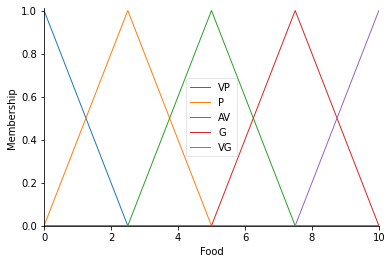

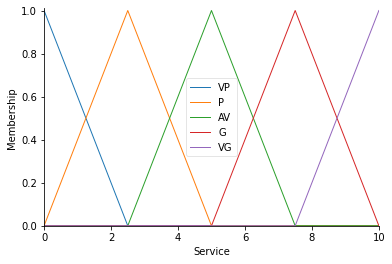

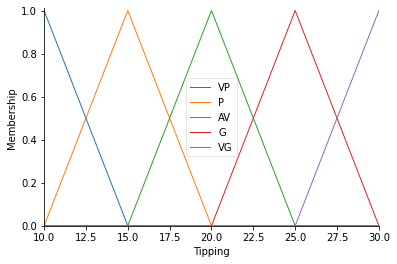

In [6]:
#names_food = ['Rất tệ', 'Tệ' ,'Bình thường', 'Ngon', 'Rất Ngon']
#names_service = ['Rất kém', 'Kém' ,'Trung bình', 'Tốt', 'Rất tốt']
#names_tipping = ['Rất ít', 'Ít' ,'Trung Bình', 'Nhiều', 'Rất nhiều']
names_food = ['VP', 'P' ,'AV', 'G', 'VG']
names_service = ['VP', 'P' ,'AV', 'G', 'VG']
names_tipping = ['VP', 'P' ,'AV', 'G', 'VG']
food.automf(names =names_food)
service.automf(names =names_service)
tipping.automf(names =names_tipping)
food.view()
service.view()
tipping.view()


In [7]:
#Rule
rule0 = ctrl.Rule(antecedent=((food['VP']&service['VP'])|(food['P']&service['VP'])|(food['VP']&service['P'])), consequent= tipping['VP'], label= 'ruleVP')
rule1 = ctrl.Rule(antecedent=((food['P']&service['P'])|(food['AV']&service['VP'])|(food['P']&service['AV'])|
                              (food['AV']&service['VP'])|(food['VP']&service['AV'])|(food['VP']&service['G'])|
                              (food['G']&service['VP'])), consequent= tipping['P'], label= 'ruleP')
rule2 = ctrl.Rule(antecedent=((food['VP']&service['VG'])|(food['P']&service['G'])|(food['AV']&service['AV'])|
                              (food['G']&service['P'])|(food['VG']&service['VP'])), consequent= tipping['AV'], label= 'ruleAV')
rule3 = ctrl.Rule(antecedent=((food['G']&service['G'])|(food['AV']&service['VG'])|(food['VG']&service['AV'])|
                              (food['VG']&service['P'])|(food['P']&service['VG'])|(food['G']&service['AV'])|
                              (food['AV']&service['G'])), consequent= tipping['G'], label= 'ruleG')
rule4 = ctrl.Rule(antecedent=((food['VG']&service['VG'])|(food['G']&service['VG'])|(food['VG']&service['G'])), consequent= tipping['VG'], label= 'ruleVG')


In [8]:
#rule0.view()
#rule1.view()
#rule2.view()
#rule3.view()
#rule4.view()

In [9]:
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#tipping_ctrl = ctrl.ControlSystem(rules = [rule1, rule2, rule3, rule4, rule0])
#tipping_decision = ctrl.ControlSystemSimulation(tipping_ctrl)

#tipping_decision.input['Food'] = 3
#tipping_decision.input['Service'] = 9

#tipping_decision.compute()
#print(tipping_decision.output['Tipping'])
#tipping.view(sim = tipping_decision)

System  = ctrl.ControlSystem(rules = [rule1, rule2, rule3, rule4, rule0])
Sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)
upSampled = np.linspace(0,10,61)
x,y = np.meshgrid(upSampled, upSampled)
z = np.zeros_like(x)


In [13]:
for i in range(61):
  for j in range(61):
    sim.input['food']= x[i,j]
    sim.input['service']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['tip']

<ipython-input-21-3a2b6ab6a4ed>:5: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'z', offset= 9, cmap= 'viridis', anpha= 0.5)
<ipython-input-21-3a2b6ab6a4ed>:6: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'x', offset= 11, cmap= 'viridis', anpha= 0.5)
<ipython-input-21-3a2b6ab6a4ed>:7: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir= 'y', offset= 11, cmap= 'viridis', anpha= 0.5)


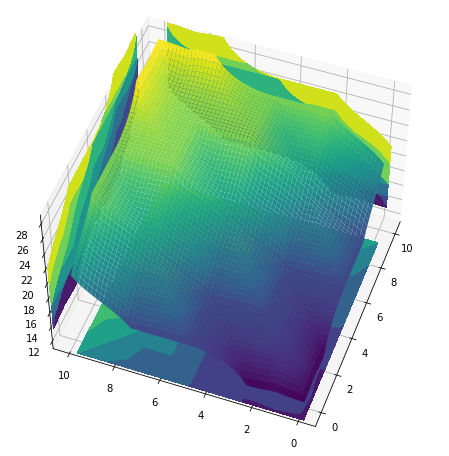

In [21]:
fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'viridis',
                      linewidth= 0.4, antialiased= True)
cset = ax.contourf(x,y,z, zdir= 'z', offset= 9, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'x', offset= 11, cmap= 'viridis', anpha= 0.5)
cset = ax.contourf(x,y,z, zdir= 'y', offset= 11, cmap= 'viridis', anpha= 0.5)
ax.view_init(50,200)